Image Dimension:  225 225 3


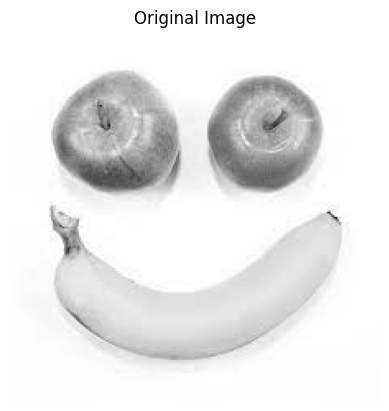

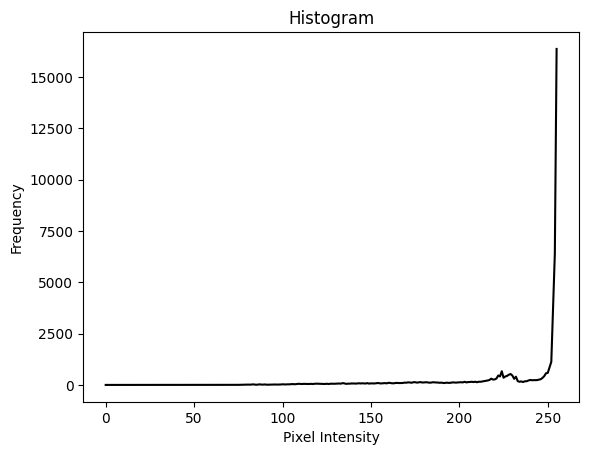

Min intensity:  5
Max intensity:  255
Dynamic Range:  251


In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = ('/content/drive/MyDrive/Copy of DIP_Lab_task_01.png')
img1 = cv2.imread(image_path)
if img1 is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    rows, cols, channels = img1.shape
    print("Image Dimension: ", rows, cols, channels)
    img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
    hist_gray = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    plt.plot(hist_gray, color='k')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
    print("Min intensity: ", img1.min())
    print("Max intensity: ", img1.max())
    print("Dynamic Range: ", img1.max() - img1.min() + 1)


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


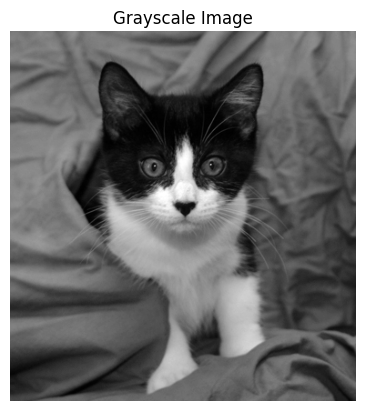

In [33]:
def rgb2gray(image):
    rows, cols, channels = image.shape
    output = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            r, g, b = image[i, j]
            gray_value = r * 0.29 + g * 0.58 + b * 0.11
            output[i, j] = np.round(gray_value).astype(np.uint8)
    return output
img2 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_02.jpg')
if img2 is None:
    print("Error: Unable to load image.")
else:
    gray_img = rgb2gray(img2)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.title('Grayscale Image')
    plt.show()


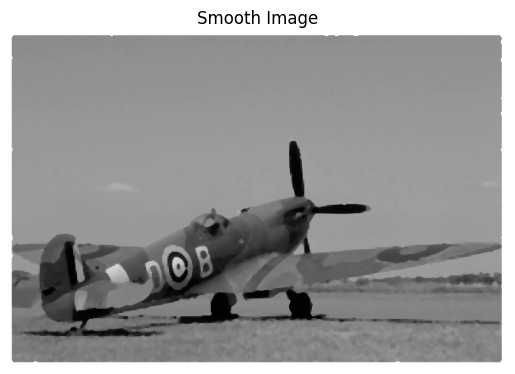

In [34]:
from scipy.ndimage import median_filter
def smooth_image(image, kernel_size=5):
    return median_filter(image, size=kernel_size)
img3 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_03 (1).png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
smooth_img = smooth_image(img3_gray, kernel_size=5)
plt.imshow(smooth_img, cmap='gray')
plt.axis('off')
plt.title('Smooth Image')
plt.show()


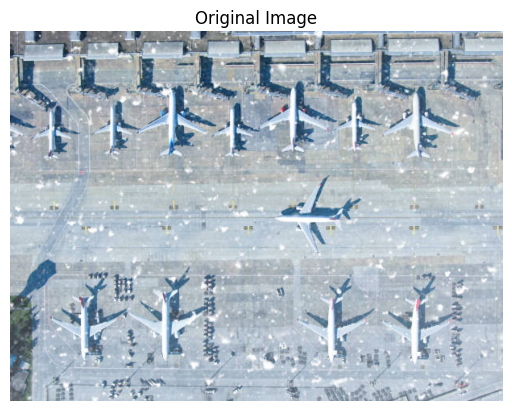

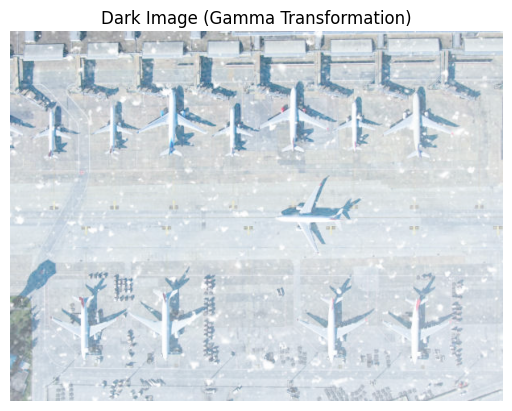

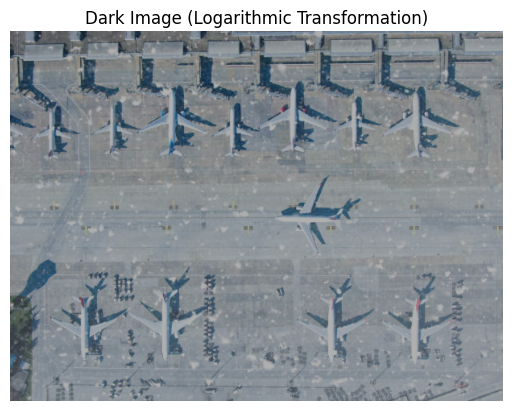

In [35]:
img4 = cv2.imread('/content/drive/MyDrive/Copy of DIP_Lab_task_04.jpg')
if img4 is None:
    print("Error: Unable to load image.")
else:
    plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
    def gammaTrans(image, gamma, c=1):
        if len(image.shape) == 2:
            normal = image / 255.0
            normal = np.power(normal, gamma)
            normal = np.clip(normal * 255, 0, 255)
            return normal.astype(np.uint8)
        else:
            normal = image / 255.0
            normal = np.power(normal, gamma)
            normal = np.clip(normal * 255, 0, 255)
            return normal.astype(np.uint8)
    def logTrans(image, c=1):
        if len(image.shape) == 2:
            normal = image / 255.0
            normal = c * np.log1p(normal)
            normal = np.clip(normal * 255, 0, 255)
            return normal.astype(np.uint8)
        else:
            normal = np.zeros_like(image, dtype=np.float32)
            for i in range(3):
                normal[:, :, i] = c * np.log1p(image[:, :, i] / 255.0)
            normal = np.clip(normal * 255, 0, 255)
            return normal.astype(np.uint8)
    dark_img = gammaTrans(img4, gamma=0.5)
    plt.imshow(cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Dark Image (Gamma Transformation)')
    plt.show()
    dark1 = logTrans(img4, c=1)
    plt.imshow(cv2.cvtColor(dark1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Dark Image (Logarithmic Transformation)')
    plt.show()


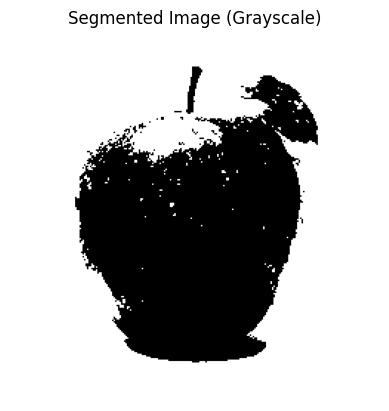

In [36]:


img5 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_05.jpg')


img_gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
threshold = 127
_, segmented_img = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
b, g, r = cv2.split(img5)
_, b = cv2.threshold(b, threshold, 255, cv2.THRESH_BINARY)
_, g = cv2.threshold(g, threshold, 255, cv2.THRESH_BINARY)
_, r = cv2.threshold(r, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')
plt.title('Segmented Image (Grayscale)')
plt.show()
